# Part 4-ART HopSkipJump Attack


In this part, you will play with the most representative black-box adversarial example agorithm, called **HopSkipJump** (https://arxiv.org/abs/1904.02144), to attack ImageNet100 classifier. We use this tutorial from adversarial-robustness-toolbox (https://github.com/Trusted-AI/adversarial-robustness-toolbox) for you to be familiar with the implementation. In particular, you are supposed to attack 'notebook_computer.jpg' from (https://github.com/nottombrown/imagenet-stubs/tree/master/imagenet_stubs/images). After running the attack, please answer Question 2-4.

In [1]:
# # Install adversarial-robustness-toolbox
# !pip install pip install adversarial-robustness-toolbox

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import tensorflow as tf

tf.compat.v1.disable_eager_execution()

import imagenet_stubs
import numpy as np
import tensorflow.keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow.keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical

  Cloning https://github.com/nottombrown/imagenet_stubs to /tmp/pip-req-build-scs6n3ze
  Running command git clone --filter=blob:none --quiet https://github.com/nottombrown/imagenet_stubs /tmp/pip-req-build-scs6n3ze
  Resolved https://github.com/nottombrown/imagenet_stubs to commit 0b501276f54cbf45b8e1b67dccbdcbe51de88365
  Preparing metadata (setup.py) ... done


In [3]:
# prepare pre-trained model
mean_imagenet = np.zeros([224, 224, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, np.ones([224, 224, 3])))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Target image is:  681


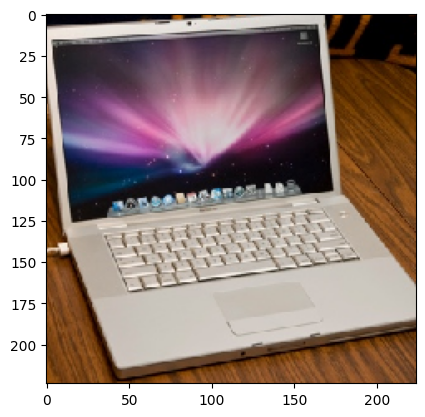

In [4]:
# prepare target image (image to attack)
target_image_name = 'notebook_computer.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()

# Question 14 [5] #

<font size=4> ===> Run HopSkipJump to attack 'notebook_computer.jpg'. </font>

# HopSkipJump Untargeted Attack

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0. L2 error 11129.1045 and class label 620.


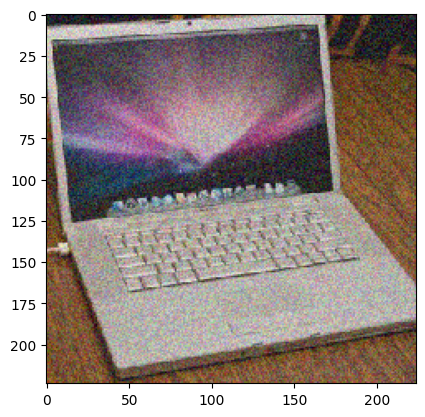

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10. L2 error 4983.4766 and class label 620.


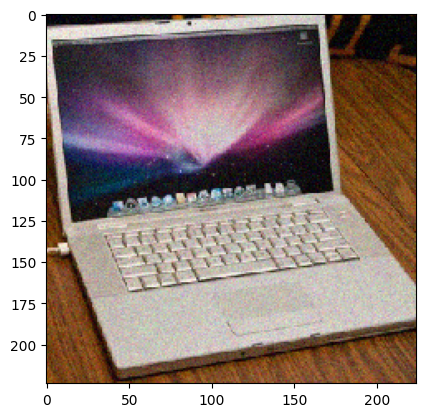

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20. L2 error 3559.7266 and class label 620.


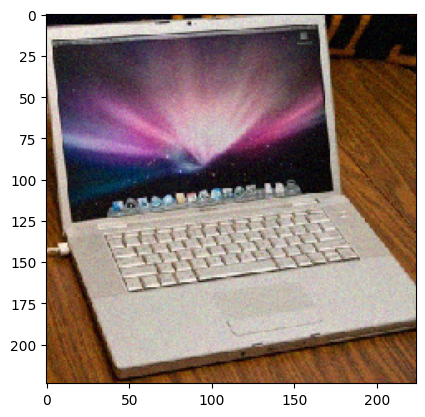

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30. L2 error 2632.6853 and class label 620.


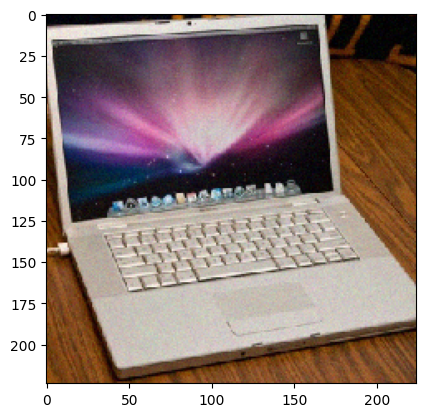

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 40. L2 error 2118.334 and class label 620.


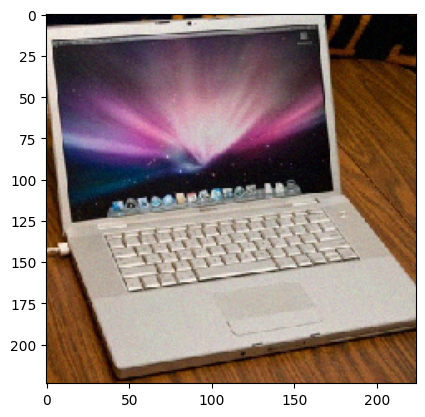

In [5]:
### Attack1: Non-targeted Attack
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None

# Run attack for 50 iterations
for i in range(5):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error",
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)

    attack.max_iter = iter_step

# HopSkipJump Targeted Attack

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0. L2 error 0.0 and class label 681.


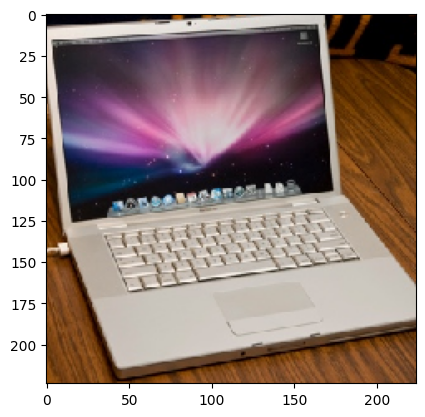

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10. L2 error 0.0 and class label 681.


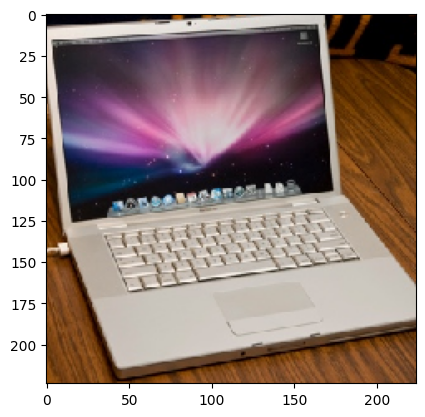

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20. L2 error 0.0 and class label 681.


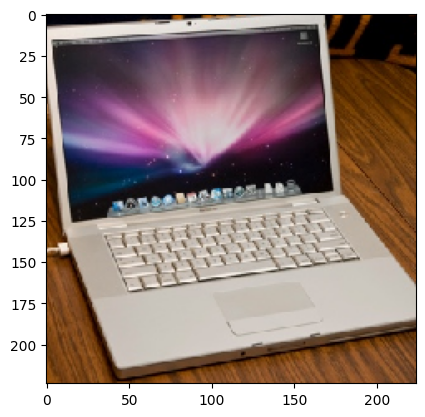

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30. L2 error 0.0 and class label 681.


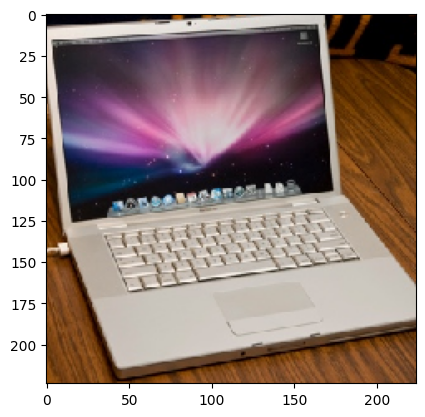

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 40. L2 error 0.0 and class label 681.


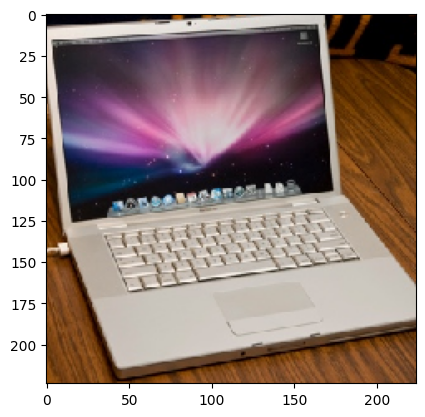

In [6]:
### Attack2: Targeted Attack
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None

# Run attack for 50 iterations
for i in range(5):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([866], 1000), x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error",
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)

    attack.max_iter = iter_step

# Question 15 [5] #

<font size=4> ===> Compare the results of untargeted attack and targeted attack, what do you conclude? How do you explain it? </font>

# HopSkipJump Advanced Targeted Attack

Init image is:  866


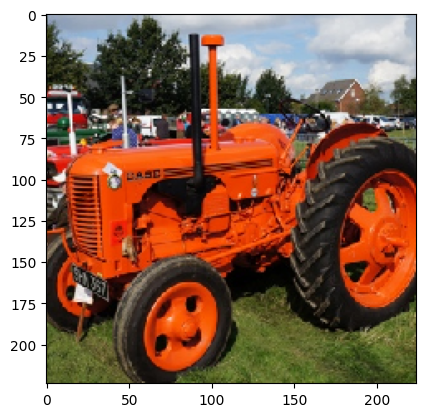

In [7]:
### Now we load an image from the target class
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0. L2 error 43986.844 and class label 866.


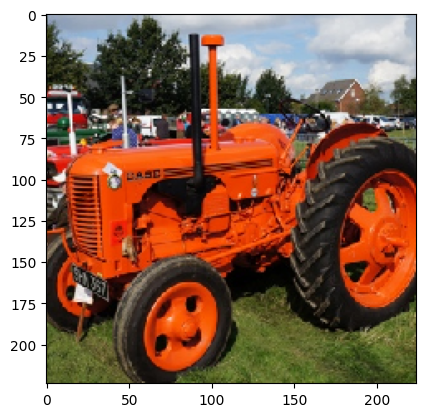

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10. L2 error 18829.244 and class label 866.


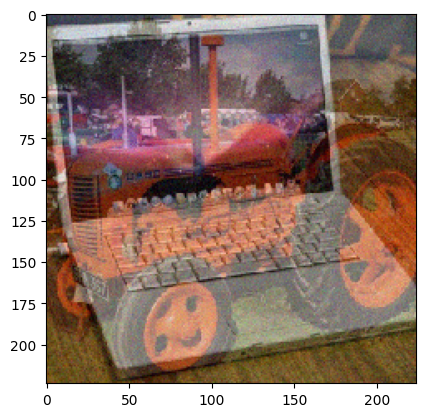

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20. L2 error 16924.44 and class label 866.


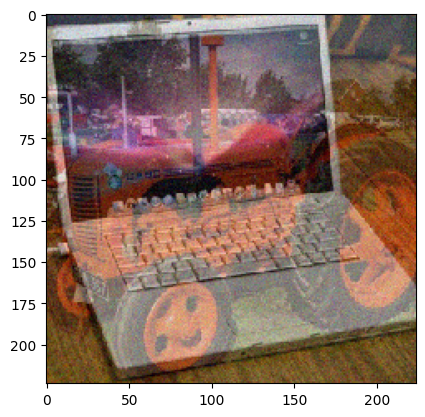

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30. L2 error 15438.399 and class label 866.


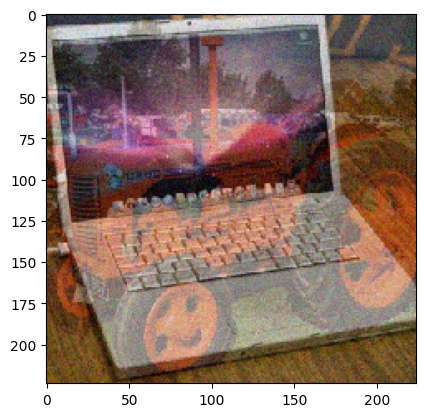

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 40. L2 error 14063.041 and class label 866.


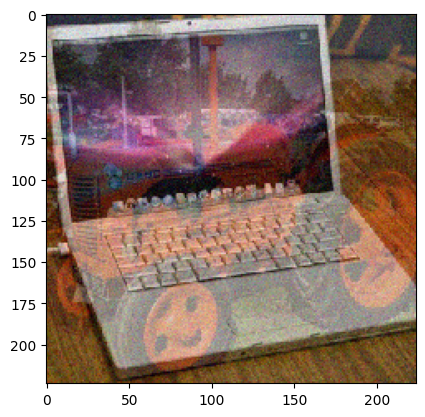

In [8]:
### Attack3: Advanced Targeted Attack
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = np.array([init_image])

# Run attack for 50 iterations
for i in range(5):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([866], 1000), x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error",
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)

    attack.max_iter = iter_step

# Question 16 [5] #

<font size=4> ===> What's the difference between Targeted Attack and Advanced Targeted Attack. How do you explain the results? </font>